# Exploratory Data Analysis - Insurance dataset

### Steps involved :
1. Data Collection
2. Data Visualization
    1. Univariate Analysis
    2. Bivariate Analysis
    3. Multivariate Analysis
3. Hypothesis testing
    1. Z-Test
    2. ANOVA
    3. Chi-square test
4. Data Preprocessing
5. Report

## Import the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import pandas_profiling as pp
from statsmodels.stats import weightstats as stests
from sklearn.preprocessing import StandardScaler
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import chi2

c:\Users\sneha\OneDrive\Desktop\Predict-health-insurance-amount\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data collection

In [2]:
insurance = pd.read_csv(r"..\..\Dataset\insurance.csv")

In [3]:
insurance.shape

(1338, 7)

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Observations : 
  1. No null values
  2. Features with categorical values : Sex, Smoker, Region.

## Data Visualization

### Univariate Analysis

In [6]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Explore categorical values to convert it to numeric.
print("\u0332".join("GENDER "))
print(insurance.sex.value_counts())

print("\u0332".join("SMOKER "))
print(insurance.smoker.value_counts())

print("\u0332".join("REGION "))
print(insurance.region.value_counts())

G̲E̲N̲D̲E̲R̲ 
male      676
female    662
Name: sex, dtype: int64
S̲M̲O̲K̲E̲R̲ 
no     1064
yes     274
Name: smoker, dtype: int64
R̲E̲G̲I̲O̲N̲ 
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


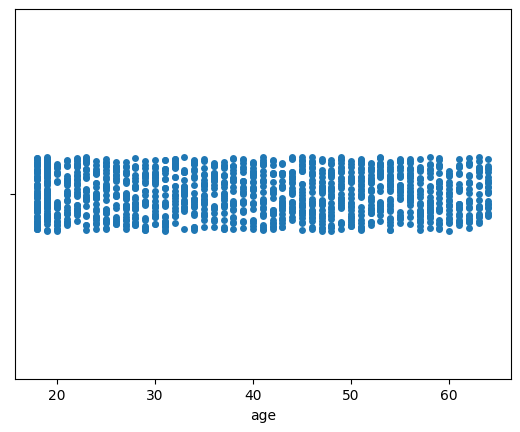

In [10]:
# Age Column

sns.stripplot(x=insurance["age"])
plt.savefig('./VisualResults/EDA/age.png')

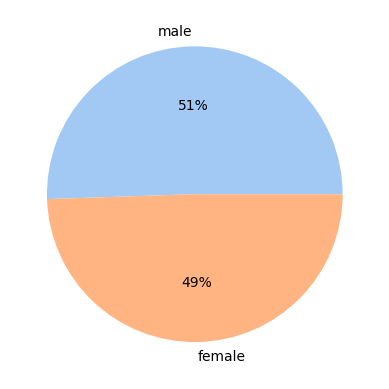

In [11]:
# Gender Column
df = insurance['sex'].value_counts()

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(df, labels = df.index, colors = colors, autopct='%.0f%%')
plt.savefig('./VisualResults/EDA/gender.png')
plt.show()

c:\Users\sneha\OneDrive\Desktop\Predict-health-insurance-amount\venv\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


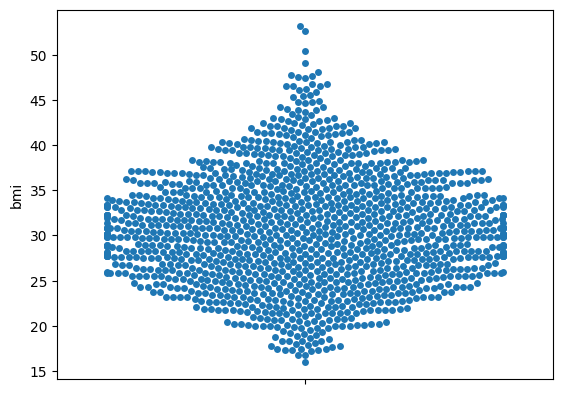

In [12]:
# BMI column
sns.swarmplot(data = insurance["bmi"])
plt.savefig('./VisualResults/EDA/bmi.png')

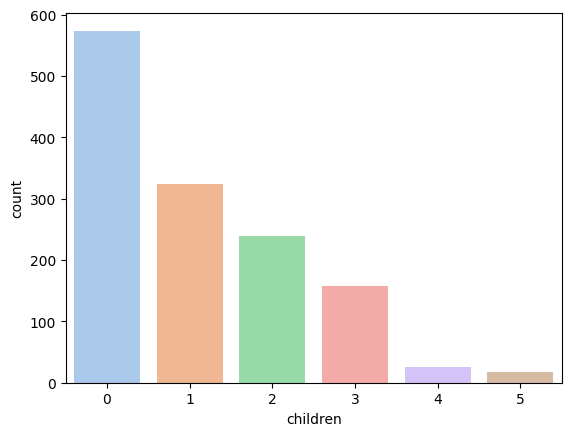

In [13]:
# Children Column

sns.countplot(x='children',data=insurance,palette="pastel")  
plt.savefig('./VisualResults/EDA/children.png')
plt.show()  

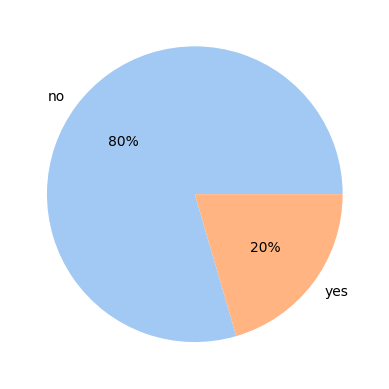

In [14]:
df = insurance['smoker'].value_counts()

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(df, labels = df.index, colors = colors, autopct='%.0f%%')
plt.savefig('./VisualResults/EDA/smoker.png')
plt.show()

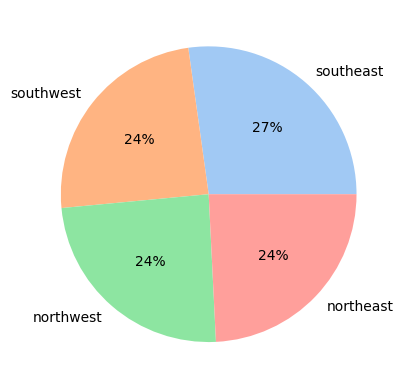

In [15]:
# Region Column
df = insurance['region'].value_counts()

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(df, labels = df.index, colors = colors, autopct='%.0f%%')
plt.savefig('./VisualResults/EDA/region.png')
plt.show()


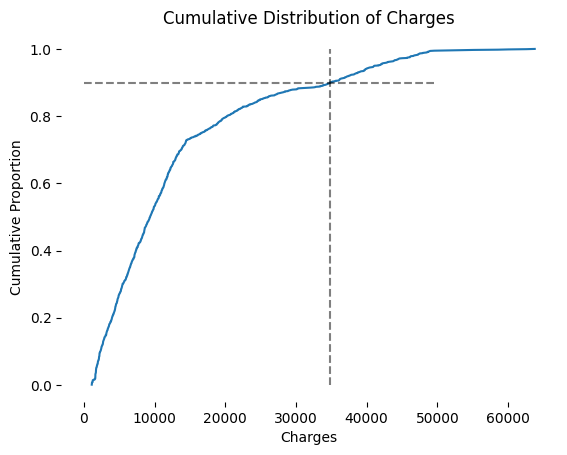

In [16]:
# Charges column

e = ECDF(insurance.charges)
plt.subplot(1, 1, 1)
plt.plot(e.x, e.y)
plt.title("Cumulative Distribution of Charges")
plt.ylabel("Cumulative Proportion")
plt.xlabel("Charges")
plt.plot([0, 50000], [0.9, 0.9], "k--", alpha=0.5)
plt.plot([insurance.charges.quantile(.9), insurance.charges.quantile(.9)], [0, 1], "k--", alpha=0.5)
plt.box(False)
plt.savefig('./VisualResults/EDA/charges.png')

Next, we analyse the distribution of the data in each column.

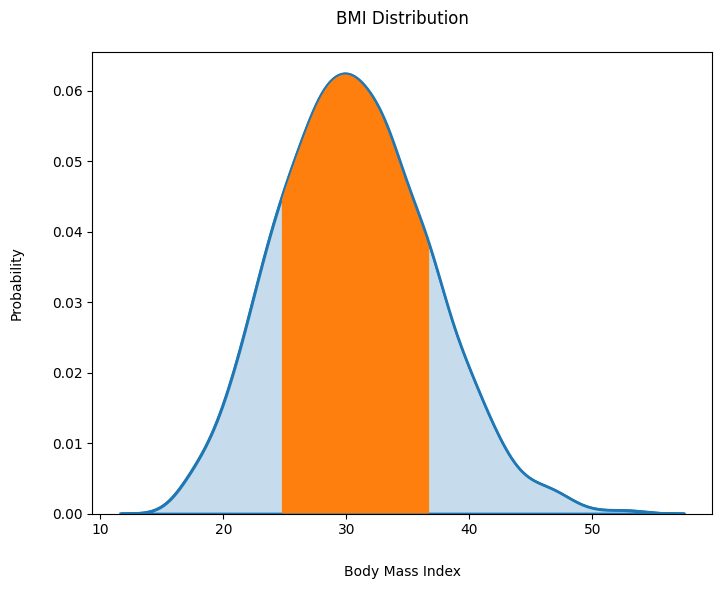

In [17]:
plt.figure(figsize=(8, 6))
bmi=insurance['bmi']
# Draw the density curve with it's area shaded
sns.kdeplot(bmi, linewidth=2, fill=True)
# Invoke kdeplot() again to get reference to axes 
ax = sns.kdeplot(bmi)

# Get all the lines used to draw the density curve 
kde_lines = ax.get_lines()[-1]
kde_x, kde_y = kde_lines.get_data()

# Use Numpy mask to filter the lines for region 
mask = (kde_x > bmi.mean()-bmi.std()) & (kde_x < bmi.mean()+bmi.std())
filled_x, filled_y = kde_x[mask], kde_y[mask]

# Shade the partial region 
ax.fill_between(filled_x, y1=filled_y)


plt.title("BMI Distribution", pad=20)
plt.xlabel("Body Mass Index", labelpad=20)
plt.ylabel("Probability", labelpad=20)
plt.savefig('./VisualResults/EDA/distribution/bmi.png')
plt.show()


In [18]:
# Area under the curve
area = np.trapz(filled_y, filled_x)
print(f"Area of shaded region: {area.round(4)}")
print(bmi.mean()-bmi.std())
print(bmi.mean()+bmi.std())

Area of shaded region: 0.6525
24.565209949307533
36.76158377266556


Observation : We can conclude that 65% of the people in the dataset are between 25 to 35 BMI value

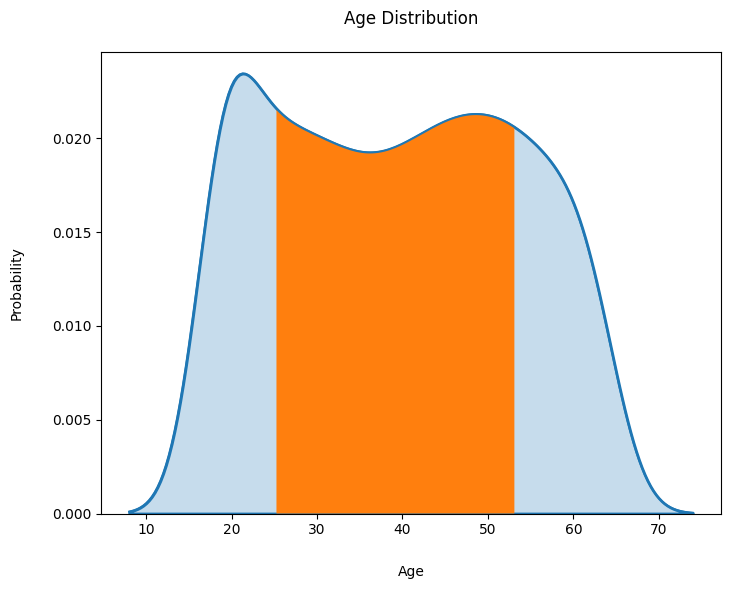

Area of shaded region: 0.5658
25.157065031845136
53.25698579027744


In [19]:
plt.figure(figsize=(8, 6))
age=insurance['age']
# Draw the density curve with it's area shaded
sns.kdeplot(age, linewidth=2, fill=True)
# Invoke kdeplot() again to get reference to axes 
ax = sns.kdeplot(age)

# Get all the lines used to draw the density curve 
kde_lines = ax.get_lines()[-1]
kde_x, kde_y = kde_lines.get_data()

# Use Numpy mask to filter the lines for region 
mask = (kde_x > age.mean()-age.std()) & (kde_x < age.mean()+age.std())
filled_age_x, filled_age_y = kde_x[mask], kde_y[mask]

# Shade the partial region 
ax.fill_between(filled_age_x, y1=filled_age_y)


plt.title("Age Distribution", pad=20)
plt.xlabel("Age", labelpad=20)
plt.ylabel("Probability", labelpad=20)
plt.savefig('./VisualResults/EDA/distribution/age.png')
plt.show()
# Area under the curve
area_age = np.trapz(filled_age_y, filled_age_x)
print(f"Area of shaded region: {area_age.round(4)}")
print(age.mean()-age.std())
print(age.mean()+age.std())

Observation : 
1. 56% of people in dataset are between 25 and 53 age
2. Distribution has very less skewness.

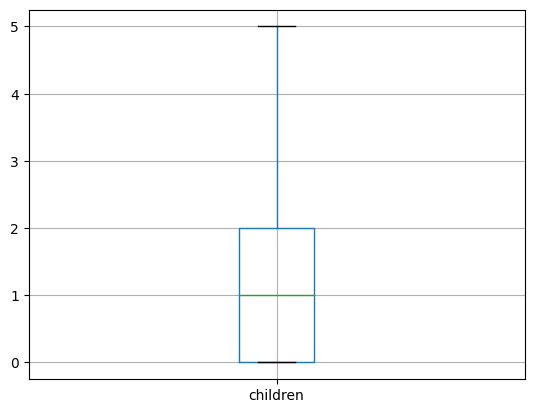

In [21]:
# Check for outliers
insurance.boxplot(column = ['children'])
plt.savefig('./VisualResults/EDA/distribution/children.png')

From the above boxplot, we can see that there are no outliers in the column.

### Bivariate Analysis

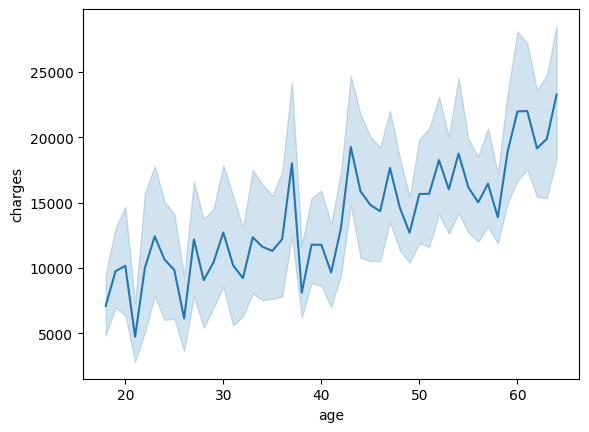

In [22]:
# Age and charges
sns.lineplot(data=insurance, x="age", y="charges")
plt.savefig('./VisualResults/EDA/bivariate/age_vs_charges.png')

In [23]:
# Gender and charges
fig = px.line(insurance, x="sex", y="charges", color="sex", markers=True)
plt.savefig('./VisualResults/EDA/bivariate/gender_vs_charges.png')
fig.show()

<Figure size 640x480 with 0 Axes>

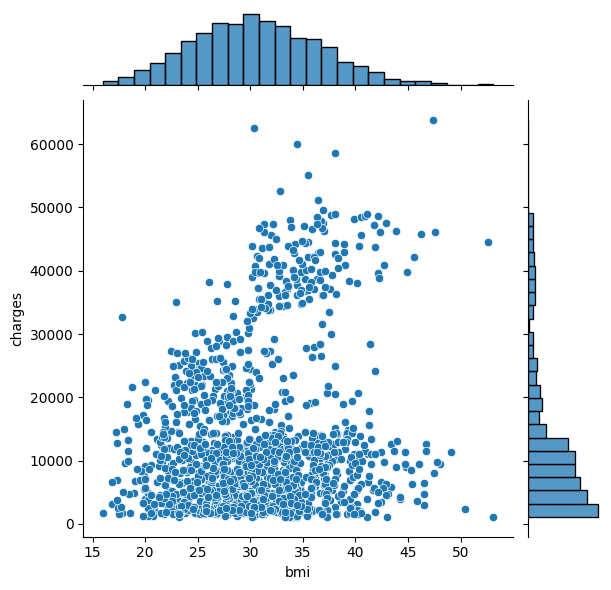

In [24]:
# BMI and charges
sns.jointplot(x=insurance.bmi, y=insurance.charges, kind='scatter')
plt.savefig('./VisualResults/EDA/bivariate/bmi_vs_charges.png')

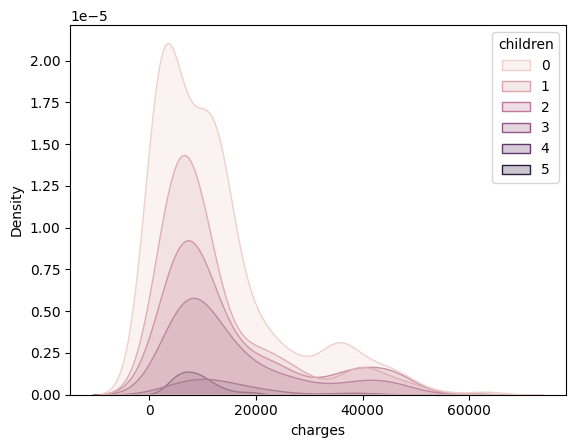

In [25]:
# Children and charges
sns.kdeplot(data=insurance, x='charges', hue='children', fill=True)
plt.savefig('./VisualResults/EDA/bivariate/child_vs_charges.png')

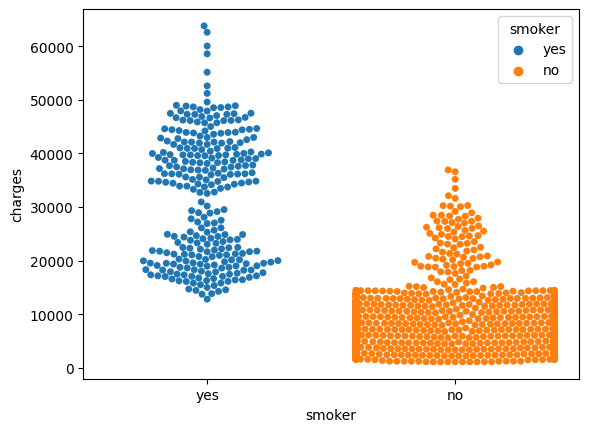

In [28]:
# Smoker and charges
sns.swarmplot(x=insurance['smoker'],y=insurance['charges'],hue=insurance['smoker'])
plt.savefig('./VisualResults/EDA/bivariate/smoker_vs_charges.png')

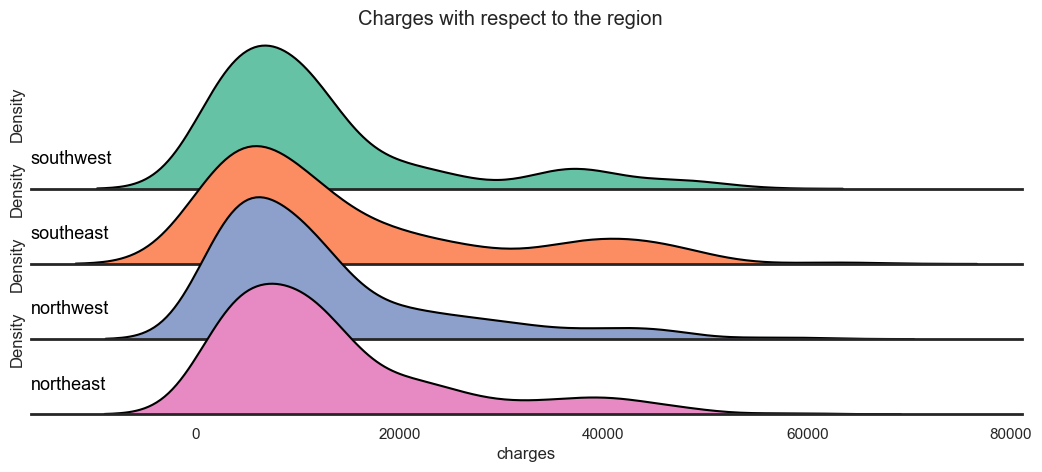

In [29]:
# Region and charges
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)

g = sns.FacetGrid(insurance, palette=palette, row="region", hue="region", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="charges", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="charges", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "region")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="charges")
g.despine( left=True)
plt.suptitle('Charges with respect to the region', y=0.98)
plt.savefig('./VisualResults/EDA/bivariate/region_vs_charges.png')

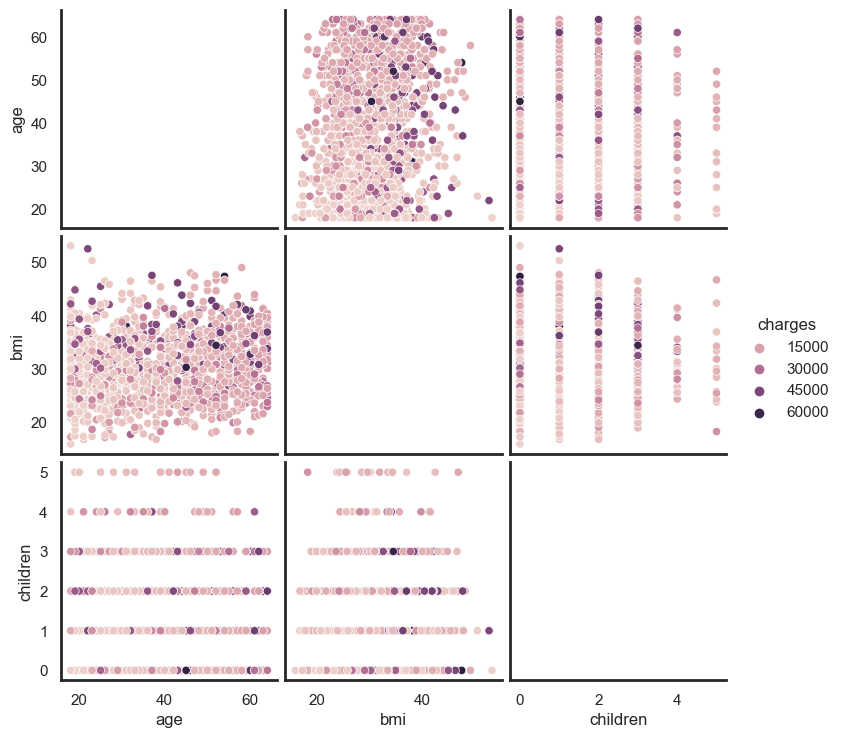

In [30]:
sns.pairplot(data=insurance, hue="charges")
plt.savefig('./VisualResults/EDA/bivariate/pairplot.png')

### Multivariate Analysis

In [31]:
numValues = {'sex': {'male' : 0 , 'female' : 1} ,
             'smoker': {'no': 0 , 'yes' : 1},
             'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
insuranceCopy = insurance.copy()
insuranceCopy.replace(numValues, inplace=True)

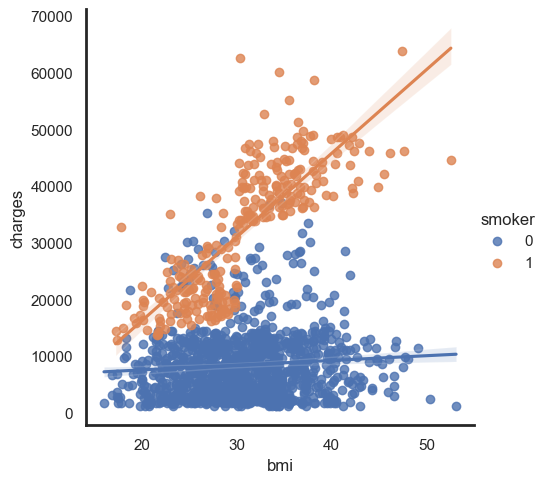

In [32]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insuranceCopy)
plt.savefig('./VisualResults/EDA/multivariate/bmi_charges_smoker.png')

Observation : Regression line for smokers has a much steeper slope, relative to the line for nonsmokers

In [33]:
fig = px.violin(
    insuranceCopy, y="charges", x="region", color="smoker", box=True, points="all", hover_data=insuranceCopy.columns
)
plt.savefig('./VisualResults/EDA/multivariate/charge_region_smoker.png')
fig.show()

<Figure size 640x480 with 0 Axes>

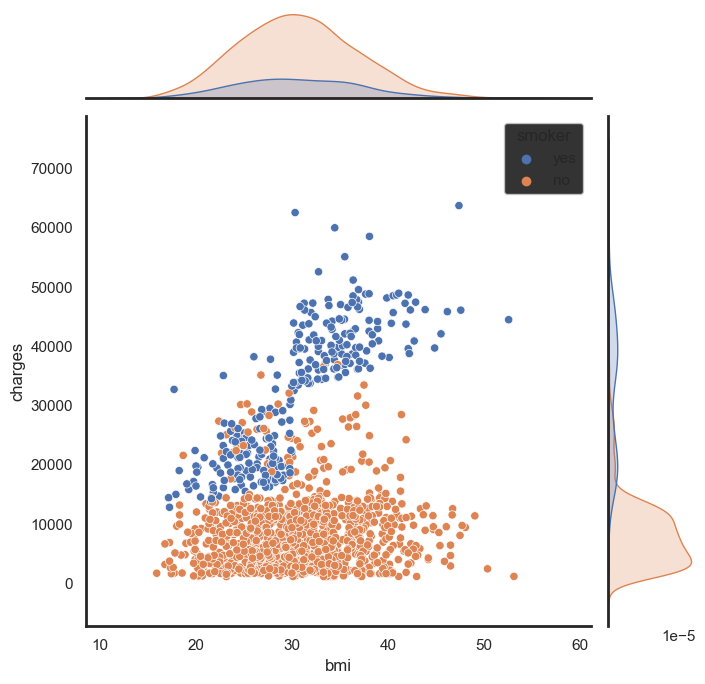

In [34]:
sns.jointplot(
    data=insurance, x="bmi", y="charges", hue="smoker", height=7
)
plt.savefig('./VisualResults/EDA/multivariate/bmi_charges_smoker.png')

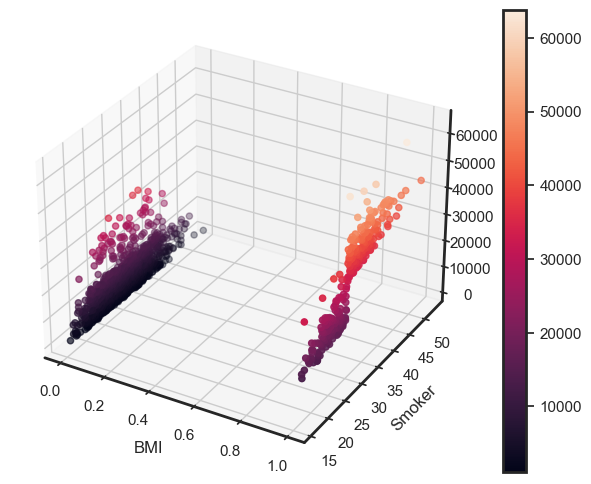

In [ ]:
bmi = insuranceCopy['bmi']
smoker = insuranceCopy['smoker']
charges = insuranceCopy['charges']
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

plt_3d = ax.scatter3D(smoker, bmi, charges, c = (bmi + smoker + charges))
ax.set_xlabel('BMI')
ax.set_ylabel('Smoker')
plt.colorbar(plt_3d)

plt.show()

## Hypothesis testing

### Z-Test

<h5> 1. Feature : Gender </h5>

- Null Hypothesis : Mean medical expense for both males and females is the same.

In [35]:
sample1=insuranceCopy[insuranceCopy["sex"]==0]["charges"]
sample2=insuranceCopy[insuranceCopy["sex"]==1]["charges"]
z_stat, p_val=stests.ztest(sample1,sample2)
print("p-value :",p_val)
if p_val<0.05:
    print("Reject null hypothesis. Mean charges for male and female is not the same.")
else:
    print("Accept null hypothesis. Mean charges for male and female is the same.")

p-value : 0.03594521741682005
Reject null hypothesis. Mean charges for male and female is not the same.


<h5> 2. Feature : Smoker </h5>

- Null Hypothesis : Mean medical expense for smokers and non-smokers is the same.

In [36]:
sample1=insuranceCopy[insuranceCopy["smoker"]==0]["charges"]
sample2=insuranceCopy[insuranceCopy["smoker"]==1]["charges"]
z_stat, p_val=stests.ztest(sample1,sample2)
if p_val<0.05:
    print("Reject null hypothesis. Mean charges for smoker and non-smoker is not the same.")
else:
    print("Accept null hypothesis. Mean charges for smoker and non-smoker is the same.")

Reject null hypothesis. Mean charges for smoker and non-smoker is not the same.


### ANOVA

<h5> 1. Feature : Children </h5>

- Null Hypothesis : Number of children has correlation with insurance amount.

In [37]:
fvalue,pvalue=stats.f_oneway(insuranceCopy["charges"],insuranceCopy["children"])
if p_val<0.05:
    print("Reject null hypothesis.  Number of children does not have correlation with insurance amount.")
else:
    print("Accept null hypothesis.  Number of children has correlation with insurance amount.")

Reject null hypothesis.  Number of children does not have correlation with insurance amount.


<h5> 2. Feature : Region </h5>

- Null Hypothesis : Region has correlation with insurance amount.

In [38]:
fvalue,pvalue=stats.f_oneway(insuranceCopy["charges"],insuranceCopy["region"])
if p_val<0.05:
    print("Reject null hypothesis. Region does not have correlation with insurance amount.")
else:
    print("Accept null hypothesis. Region has correlation with insurance amount.")

Reject null hypothesis. Region does not have correlation with insurance amount.


### Chi-square test

<h5> Features : Gender and Smoker </h5>

In [39]:
df_chi = pd.read_csv('../../Dataset/insurance.csv')
contingency_table=pd.crosstab(df_chi["bmi"],df_chi["charges"])
print('contingency_table :-\n',contingency_table)

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])

#Degree of freedom
ddof=(no_of_rows-1)*(no_of_columns-1)
alpha = 0.05

chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if (chi_square_statistic>=critical_value) & (p_value<=alpha):
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

contingency_table :-
 charges  1121.87390   1131.50660   1135.94070   1136.39940   1137.01100   \
bmi                                                                        
15.960             0            0            0            0            0   
16.815             0            0            0            0            0   
17.195             0            0            0            0            0   
17.290             0            0            0            0            0   
17.385             0            0            0            0            0   
...              ...          ...          ...          ...          ...   
48.070             0            0            0            0            0   
49.060             0            0            0            0            0   
50.380             0            0            0            0            0   
52.580             0            0            0            0            0   
53.130             0            0            0            0       

### Visualization

In [40]:
importances = insuranceCopy.drop("charges", axis=1).apply(lambda x: x.corr(insuranceCopy.charges))
indices = np.argsort(importances)
print(importances[indices])

sex        -0.057292
region      0.011741
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
dtype: float64


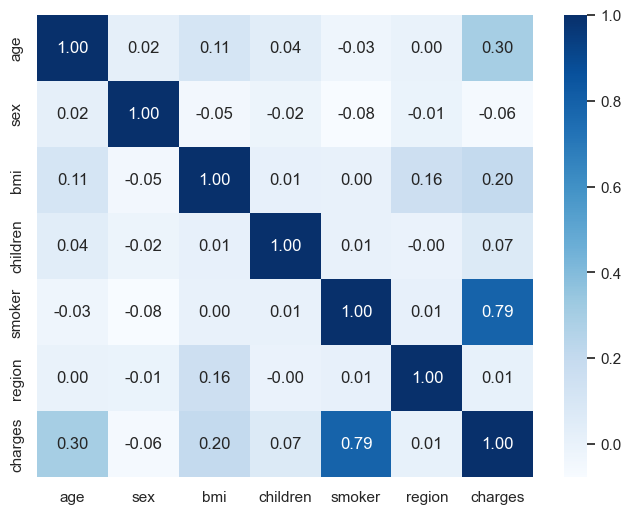

In [41]:
corr = insuranceCopy.corr()
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr,cmap='Blues',annot=True,fmt=".2f",ax=ax)
plt.savefig('./VisualResults/EDA/insurance.png')

## Data Preprocessing

In [42]:
# Convert categorical features to numerical features.

numValues = {'sex': {'male' : 0 , 'female' : 1} ,
             'smoker': {'no': 0 , 'yes' : 1},
             'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
insuranceCopy = insurance.copy()
insuranceCopy.replace(numValues, inplace=True)

In [43]:
insuranceCopy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [44]:
insuranceCopy.duplicated().sum()

1

In [45]:
insuranceCopy.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [46]:
# Save as CSV file.
insuranceCopy.to_csv('../../Dataset/processedData.csv',index=False)

In [47]:
# Scale the values
scaledVal = insuranceCopy.copy()

temp1 = scaledVal.bmi
temp1 = temp1.values.reshape(-1,1)
scaledVal['bmi'] = StandardScaler().fit_transform(temp1)

temp2 = scaledVal.age
temp2 = temp2.values.reshape(-1,1)
scaledVal['age'] = StandardScaler().fit_transform(temp2)

temp3 = scaledVal.charges
temp3 = temp3.values.reshape(-1,1)
scaledVal['charges'] = StandardScaler().fit_transform(temp3)

scaledVal.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


In [48]:
scaledVal.to_csv('../../Dataset/scaledData.csv',index=False)

## Report

In [ ]:
#Report
report1 = pp.ProfileReport(insurance)

#Save the report in HTML format.
report1.to_file("..\..\Report\insurance.html")

In [ ]:
#Report
report1 = pp.ProfileReport(processedData)

#Save the report in HTML format.
report1.to_file("..\..\Report\processedData.html")

In [ ]:
#Report
report1 = pp.ProfileReport(scaledVal)

#Save the report in HTML format.
report1.to_file("..\..\Report\scaledVal.html")